In [81]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [82]:
df = pd.read_csv('poverty_level_wages.csv')

# sort in ascending order by year
print(type(df.year[0]))
df.sort_values(by='year')

<class 'numpy.int64'>


,year,annual_poverty-level_wage,hourly_poverty-level_wage,0-75%_of_poverty_wages,75-100%_of_poverty_wages,share_below_poverty_wages,100-125%_of_poverty_wages,125-200%_of_poverty_wages,200-300%_of_poverty_wages,300%+_of_poverty_wages,...,women_300%+_of_poverty_wages,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
49,1973,4701,2.26,9.3,16.3,25.6,12.7,32.9,19.8,9.0,...,2.4,23.8,13.7,38.5,37.3,25.3,50.6,34.9,27.1,48.2
48,1974,5158,2.48,7.5,16.8,24.3,15.2,31.0,20.6,8.9,...,2.3,22.7,12.8,37.0,34.6,22.8,47.4,33.7,24.5,49.7
47,1975,5595,2.69,10.2,15.7,25.9,13.9,32.0,19.5,8.7,...,2.5,24.2,14.4,38.2,36.7,25.1,49.1,35.0,27.3,47.5
46,1976,5914,2.84,7.1,18.0,25.1,15.2,31.2,19.6,9.0,...,2.8,23.6,14.1,36.7,34.8,23.8,46.2,34.8,27.2,46.3
45,1977,6284,3.02,6.2,20.7,26.9,13.6,30.3,20.5,8.7,...,2.4,25.4,15.5,38.7,36.7,28.0,45.7,36.0,25.6,52.8
44,1978,6718,3.23,5.4,20.6,26.0,15.4,29.6,19.9,9.1,...,2.3,24.5,14.7,37.5,35.5,25.2,46.0,32.6,23.8,46.5
43,1979,7360,3.54,5.1,20.7,25.8,13.6,31.1,20.7,8.9,...,2.4,24.3,14.3,37.3,33.7,25.1,42.9,34.6,25.1,49.6
42,1980,8181,3.93,4.6,21.1,25.7,13.8,31.8,19.9,8.8,...,2.4,24.2,14.4,36.5,34.1,25.3,43.0,33.6,25.3,46.5
41,1981,8956,4.31,5.3,22.5,27.8,14.4,29.1,20.5,8.2,...,2.4,26.2,16.4,38.4,35.7,26.8,44.7,37.1,29.1,49.4
40,1982,9499,4.57,10.6,17.6,28.3,13.5,29.4,19.7,9.1,...,2.8,26.6,17.3,37.8,36.9,29.3,44.4,37.5,30.6,47.7


In [83]:
df_filtered = df[["year", "annual_poverty-level_wage", "white_share_below_poverty_wages", "white_men_share_below_poverty_wages", "white_women_share_below_poverty_wages", "black_share_below_poverty_wages", "black_men_share_below_poverty_wages", "black_women_share_below_poverty_wages", "hispanic_share_below_poverty_wages", "hispanic_men_share_below_poverty_wages", "hispanic_women_share_below_poverty_wages"]]
df_filtered.sort_values(by='year')


,year,annual_poverty-level_wage,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
49,1973,4701,23.8,13.7,38.5,37.3,25.3,50.6,34.9,27.1,48.2
48,1974,5158,22.7,12.8,37.0,34.6,22.8,47.4,33.7,24.5,49.7
47,1975,5595,24.2,14.4,38.2,36.7,25.1,49.1,35.0,27.3,47.5
46,1976,5914,23.6,14.1,36.7,34.8,23.8,46.2,34.8,27.2,46.3
45,1977,6284,25.4,15.5,38.7,36.7,28.0,45.7,36.0,25.6,52.8
44,1978,6718,24.5,14.7,37.5,35.5,25.2,46.0,32.6,23.8,46.5
43,1979,7360,24.3,14.3,37.3,33.7,25.1,42.9,34.6,25.1,49.6
42,1980,8181,24.2,14.4,36.5,34.1,25.3,43.0,33.6,25.3,46.5
41,1981,8956,26.2,16.4,38.4,35.7,26.8,44.7,37.1,29.1,49.4
40,1982,9499,26.6,17.3,37.8,36.9,29.3,44.4,37.5,30.6,47.7


Text(0.5, 1.0, 'Wages of indivdiuals below Poverty Line in United States (1973-2022)')

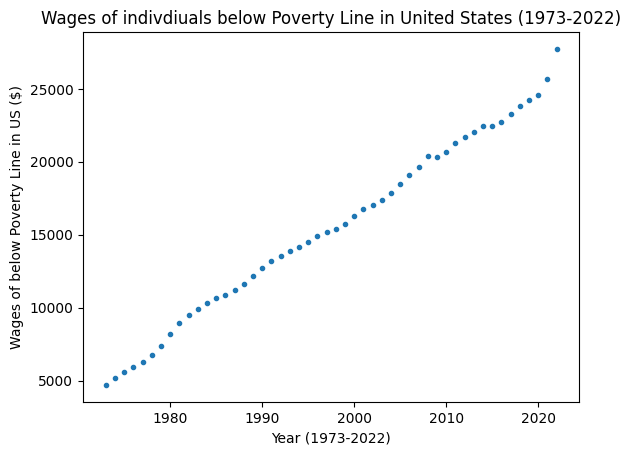

In [84]:
year = df["year"]
below_poverty_wage = df["annual_poverty-level_wage"]

plt.scatter(year,below_poverty_wage, marker=".")

plt.xlabel("Year (1973-2022)")
plt.ylabel("Wages of below Poverty Line in US ($)")

plt.title("Wages of indivdiuals below Poverty Line in United States (1973-2022)")

## **Hispanic Males**

In [85]:
train_data = df[(df['year'] >= 1973) & (df['year'] <= 2000)]
test_data = df[(df['year'] >= 2015) & (df['year'] <= 2020)]

X_train = train_data.drop('hispanic_men_share_below_poverty_wages', axis=1)
y_train = train_data['hispanic_men_share_below_poverty_wages']

X_test = test_data.drop('hispanic_men_share_below_poverty_wages', axis=1)
y_test = test_data['hispanic_men_share_below_poverty_wages']


In [86]:
model = RandomForestRegressor()


In [87]:
model.fit(X_train, y_train)


RandomForestRegressor()

In [88]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 157.45115916666745
Root Mean Squared Error: 12.547954381757508


In [89]:

# Identify the target variable
target_variable = 'hispanic_men_share_below_poverty_wages'

# Calculate the range of the target variable
target_range = df[target_variable].max() - df[target_variable].min()

print(f'Target Variable Range: {target_range}')


Target Variable Range: 29.4


In [90]:
future_data = pd.read_csv('future_data_1.csv')

# Use the trained model to make predictions
future_predictions = model.predict(future_data)


In [91]:
future_predictions = model.predict(future_data)


In [92]:
from sklearn.preprocessing import MinMaxScaler

# Select the features for scaling
features_to_scale = X_train.columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train[features_to_scale])

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test[features_to_scale])

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = model.predict(X_test_scaled)

# Calculate and print the metrics on the scaled data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f'Scaled Mean Squared Error: {mse_scaled}')

rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f'Scaled Root Mean Squared Error: {rmse_scaled}')

# Now, apply the scaler to the future data as well
future_data_scaled = scaler.transform(future_data[features_to_scale])

# Use the trained model to make predictions on the scaled future data
future_predictions_scaled = model.predict(future_data_scaled)

Scaled Mean Squared Error: 147.35746533333364
Scaled Root Mean Squared Error: 12.139088323813022


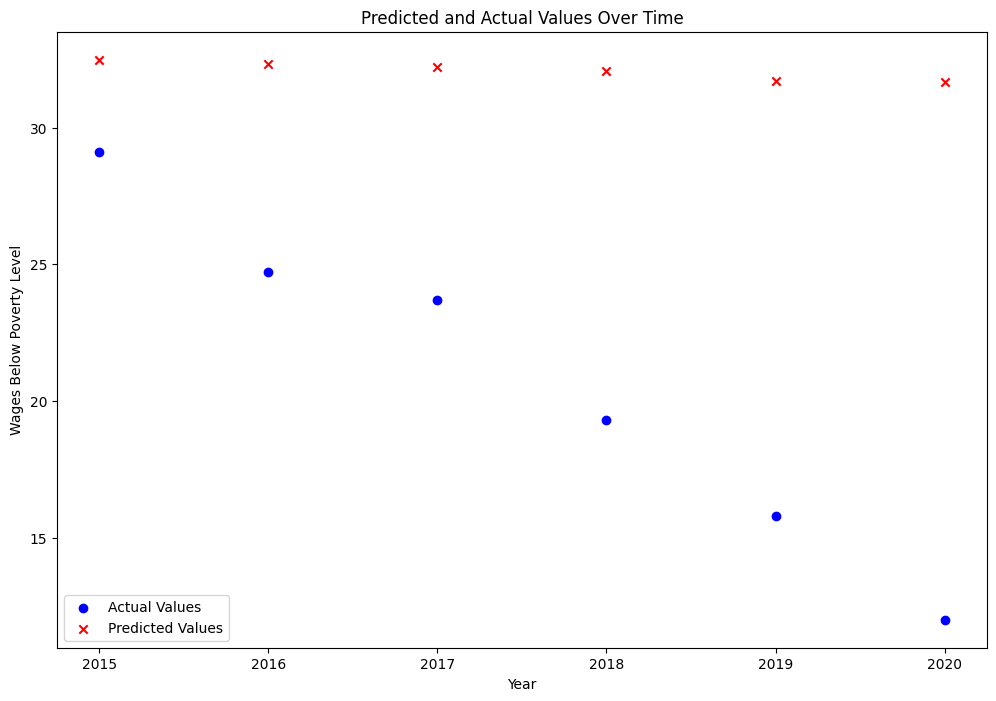

In [93]:
years = future_data['year']

# Scatter plot of Predicted and Actual Values
plt.figure(figsize=(12, 8))
plt.scatter(years, y_test, label='Actual Values', color='blue')
plt.scatter(years, y_pred, label='Predicted Values', color='red', marker='x')
plt.title('Predicted and Actual Values Over Time')
plt.xlabel('Year')
plt.ylabel('Wages Below Poverty Level')
plt.legend()
plt.show()


## **Hispanic Females**

In [103]:
train_data = df[(df['year'] >= 1973) & (df['year'] <= 2000)]
test_data = df[(df['year'] >= 2015) & (df['year'] <= 2020)]

X_train = train_data.drop('hispanic_women_share_below_poverty_wages', axis=1)
y_train = train_data['hispanic_women_share_below_poverty_wages']

X_test = test_data.drop('hispanic_women_share_below_poverty_wages', axis=1)
y_test = test_data['hispanic_women_share_below_poverty_wages']


In [104]:
model = RandomForestRegressor()

In [105]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 251.15129733333356
Root Mean Squared Error: 15.847753699920174


In [107]:

# Identify the target variable
target_variable = 'hispanic_women_share_below_poverty_wages'

# Calculate the range of the target variable
target_range = df[target_variable].max() - df[target_variable].min()

print(f'Target Variable Range: {target_range}')


Target Variable Range: 34.199999999999996


In [108]:
future_data = pd.read_csv('future_data_2.csv')

# Use the trained model to make predictions
future_predictions = model.predict(future_data)


In [109]:
future_predictions = model.predict(future_data)


In [110]:
from sklearn.preprocessing import MinMaxScaler

# Select the features for scaling
features_to_scale = X_train.columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train[features_to_scale])

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test[features_to_scale])

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = model.predict(X_test_scaled)

# Calculate and print the metrics on the scaled data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f'Scaled Mean Squared Error: {mse_scaled}')

rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f'Scaled Root Mean Squared Error: {rmse_scaled}')

# Now, apply the scaler to the future data as well
future_data_scaled = scaler.transform(future_data[features_to_scale])

# Use the trained model to make predictions on the scaled future data
future_predictions_scaled = model.predict(future_data_scaled)

Scaled Mean Squared Error: 257.58192916666667
Scaled Root Mean Squared Error: 16.049359151276622


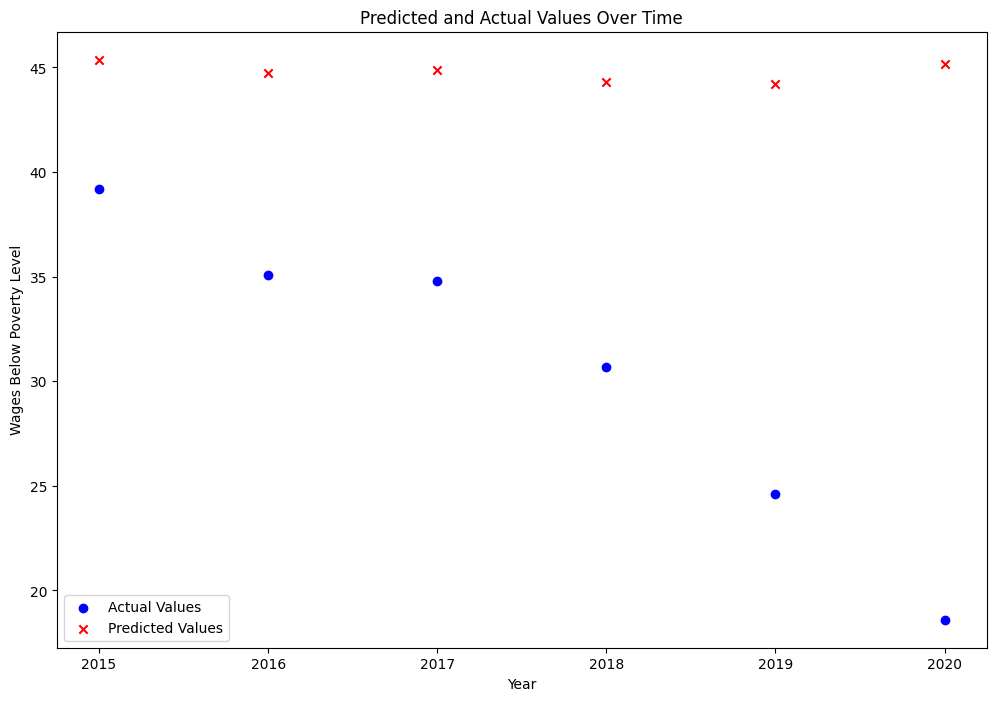

In [111]:
years = future_data['year']

# Scatter plot of Predicted and Actual Values
plt.figure(figsize=(12, 8))
plt.scatter(years, y_test, label='Actual Values', color='blue')
plt.scatter(years, y_pred, label='Predicted Values', color='red', marker='x')
plt.title('Predicted and Actual Values Over Time')
plt.xlabel('Year')
plt.ylabel('Wages Below Poverty Level')
plt.legend()
plt.show()


## **Hispanic Male SVR Model**

Mean Squared Error: 187.80476321670088
Root Mean Squared Error: 13.704187798505275
Target Variable Range: 29.4
Scaled Mean Squared Error: 152.41129430127506
Scaled Root Mean Squared Error: 12.345496924031655


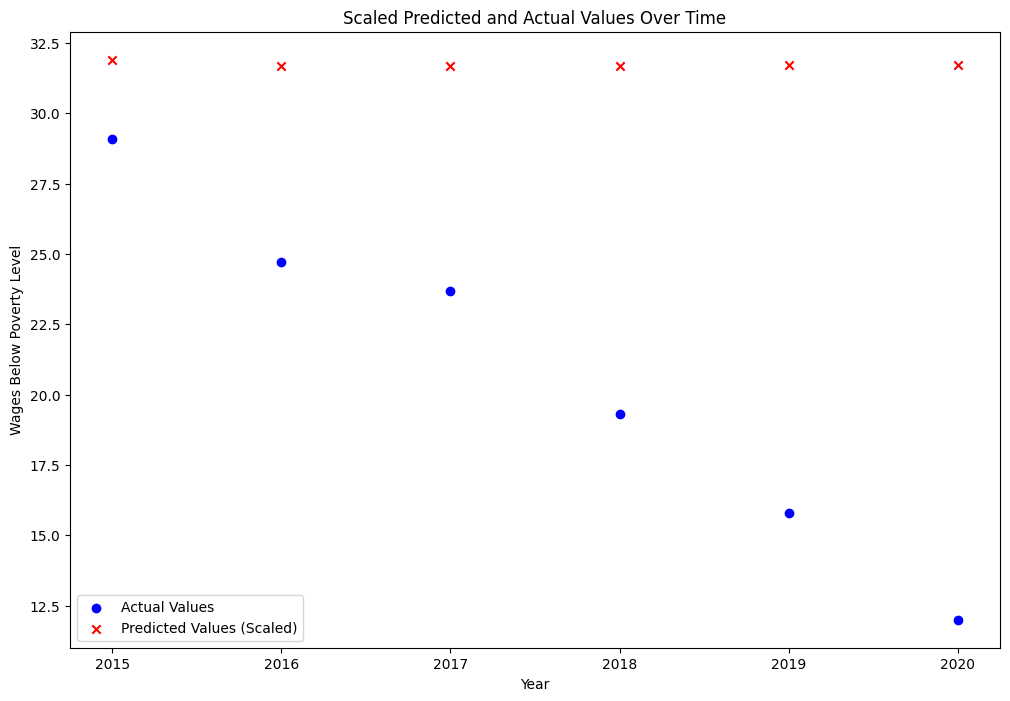

In [112]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

# Load your data
train_data = df[(df['year'] >= 1973) & (df['year'] <= 2000)]
test_data = df[(df['year'] >= 2015) & (df['year'] <= 2020)]

# Separate features and target variable for training
X_train = train_data.drop('hispanic_men_share_below_poverty_wages', axis=1)
y_train = train_data['hispanic_men_share_below_poverty_wages']

# Separate features and target variable for testing
X_test = test_data.drop('hispanic_men_share_below_poverty_wages', axis=1)
y_test = test_data['hispanic_men_share_below_poverty_wages']

# Create SVR model
model = SVR()

# Train the SVR model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the metrics on the test data
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Identify the target variable
target_variable = 'hispanic_men_share_below_poverty_wages'

# Calculate the range of the target variable
target_range = df[target_variable].max() - df[target_variable].min()
print(f'Target Variable Range: {target_range}')

# Read future data
future_data = pd.read_csv('future_data_1.csv')

# Use the trained SVR model to make predictions on the future data
future_predictions = model.predict(future_data)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit the SVR model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = model.predict(X_test_scaled)

# Calculate and print the metrics on the scaled test data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f'Scaled Mean Squared Error: {mse_scaled}')

rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f'Scaled Root Mean Squared Error: {rmse_scaled}')

# Now, apply the scaler to the future data as well
future_data_scaled = scaler.transform(future_data)

# Use the trained SVR model to make predictions on the scaled future data
future_predictions_scaled = model.predict(future_data_scaled)

# Scatter plot of Predicted and Actual Values
plt.figure(figsize=(12, 8))
plt.scatter(years, y_test, label='Actual Values', color='blue')
plt.scatter(years, y_pred_scaled, label='Predicted Values (Scaled)', color='red', marker='x')
plt.title('Scaled Predicted and Actual Values Over Time')
plt.xlabel('Year')
plt.ylabel('Wages Below Poverty Level')
plt.legend()
plt.show()


## **Hispanic Female SVR Model**

Mean Squared Error: 344.52191709100566
Root Mean Squared Error: 18.561301600130463
Target Variable Range: 34.199999999999996
Scaled Mean Squared Error: 322.74295037754956
Scaled Root Mean Squared Error: 17.96504802046322


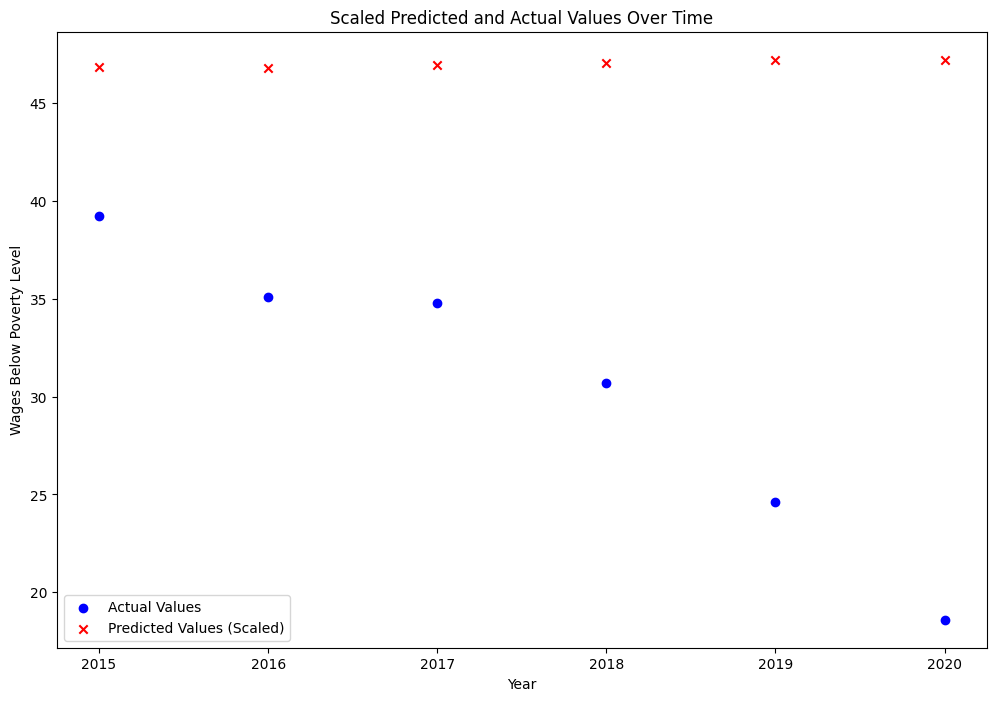

In [113]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

# Load your data
train_data = df[(df['year'] >= 1973) & (df['year'] <= 2000)]
test_data = df[(df['year'] >= 2015) & (df['year'] <= 2020)]

# Separate features and target variable for training
X_train = train_data.drop('hispanic_women_share_below_poverty_wages', axis=1)
y_train = train_data['hispanic_women_share_below_poverty_wages']

# Separate features and target variable for testing
X_test = test_data.drop('hispanic_women_share_below_poverty_wages', axis=1)
y_test = test_data['hispanic_women_share_below_poverty_wages']

# Create SVR model
model = SVR()

# Train the SVR model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the metrics on the test data
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Identify the target variable
target_variable = 'hispanic_women_share_below_poverty_wages'

# Calculate the range of the target variable
target_range = df[target_variable].max() - df[target_variable].min()
print(f'Target Variable Range: {target_range}')

# Read future data
future_data = pd.read_csv('future_data_2.csv')

# Use the trained SVR model to make predictions on the future data
future_predictions = model.predict(future_data)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit the SVR model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = model.predict(X_test_scaled)

# Calculate and print the metrics on the scaled test data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f'Scaled Mean Squared Error: {mse_scaled}')

rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f'Scaled Root Mean Squared Error: {rmse_scaled}')

# Now, apply the scaler to the future data as well
future_data_scaled = scaler.transform(future_data)

# Use the trained SVR model to make predictions on the scaled future data
future_predictions_scaled = model.predict(future_data_scaled)

# Scatter plot of Predicted and Actual Values
plt.figure(figsize=(12, 8))
plt.scatter(years, y_test, label='Actual Values', color='blue')
plt.scatter(years, y_pred_scaled, label='Predicted Values (Scaled)', color='red', marker='x')
plt.title('Scaled Predicted and Actual Values Over Time')
plt.xlabel('Year')
plt.ylabel('Wages Below Poverty Level')
plt.legend()
plt.show()
